#  XPCS   SAXS Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [2]:
%matplotlib notebook
#%matplotlib inline


In [3]:
cd /XF11ID/analysis/Analysis_Pipelines/Develop/

/XF11ID/analysis/Analysis_Pipelines/Develop


In [4]:
%run XPCS_SAXS.py
%run chx_generic_functions.py
%run Two_Time_Correlation_Function.py
%run speckle.py

/opt/conda_envs/analysis/lib/python3.4/site-packages/filestore/retrieve.py:15: UserWarning: Do not import filestore.retrieve, import filestore.api instead
  warnings.warn("Do not import filestore.retrieve, "


In [5]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [6]:
import os,sys

# Startup Setting

## Detector

In [7]:
detector = 'eiger4m_single_image'

In [8]:

path = '/home/yuzhang/Analysis/2016_1/Results/'
pathm = '/home/yuzhang/Analysis/2016_1/Results/'  #for read mask file
print ("The analysis results will be saved in : %s"%path)

dt =datetime.now()
CurTime = '%s%02d%02d-%02d%02d' % (dt.year, dt.month, dt.day,dt.hour,dt.minute)


#mask_name =  "March_colloidal"  +"_mask.npy"  #good for AuRod
mask_name = 'corapor407'+"_mask.npy"
mask_name = 'corapor416'+"_mask.npy"

#mask_name =  "March28_colloidal"  +"_mask.npy"

The analysis results will be saved in : /home/yuzhang/Analysis/2016_1/Results/


### Get the image series and metadata from the uid

In [9]:

uid = '60b2428f-e79d-4bdc-a5b7-6b13164bc6fb' 
sn = 'B1'

#hdr = db[uid]

In [10]:
if not os.path.exists(path+'%s'%(sn)):
    os.mkdir( path + sn )
    path = path + sn + '/'

In [11]:
start_time = '2016-04-15 23:25:00'
stop_time = '2016-04-16 02:00:00'

hdrs = db(start_time= start_time, stop_time = stop_time)
print ('Totally %s uids are found for this sample: %s'%(len(hdrs), sn))
sids=[]
uids=[]

Totally 43 uids are found for this sample: B1


In [12]:
for hdr in hdrs:
    s= get_sid_filenames( hdr)
    sids.append( s[0] )
    uids.append( s[1] )
sids=sids[::-1]
uids=uids[::-1]

In [13]:
i= 37
uid = uids[i]
sid = sids[i]
print (sid, uid)

14479 7aa49986-3e28-489d-99c7-20e15f7269a2


In [14]:
db[uid]['stop']

exit_status,success
reason,
run_start,7aa49986-3e28-489d-99c7-20e15f7269a2
time,11 days ago (2016-04-16T01:32:10.561103)
uid,e238c7af-8542-4e33-81df-96b1f624929d


In [15]:

#get_sid_filenames(db[uid])
#detectors = ['eiger4m_single_image', 'eiger1m_single_image', 'eiger4m_image', 'eiger1m_image']
imgs = load_data( uid, detector  )
md = imgs.md

hdf5 path = /XF11ID/data/2016/04/16/f6041782-b2e1-4b26-87db_4378_master.h5


In [16]:
imgs

<Frames>
Length: 2000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [17]:
sampling = 50

In [18]:
uid = uid[:8] +'--%s_'%sn
print (uid)

7aa49986--B1_


## Overwrite some metadata due to wrong input

In [19]:
md

{'beam_center_x': 1209.0,
 'beam_center_y': 1327.0,
 'count_time': 0.0099900002,
 'detector_distance': 4.8400002,
 'frame_time': 0.0099999998,
 'framerate': 100.00000223517424,
 'incident_wavelength': 1.4251057,
 'pixel_mask': array([[1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint32),
 'x_pixel_size': 7.5000004e-05,
 'y_pixel_size': 7.5000004e-05}

In [20]:
dpix =   0.075        #in eiger 4M, mm
Ldet = md['detector_distance'] *1000     #4840 in mm
lambda_  = md['incident_wavelength']  #1.4250998
timeperframe=md['frame_time']
#center = md['beam_center_x'], md['beam_center_y']
#center = [1212, 1487]  # center of the speckle pattern
center = [1217, 2167-536]  # center of the speckle pattern

center = [1217, 2167-536]  # center of the speckle pattern



center=[center[1], center[0]]
print (center)

[1631, 1217]


In [21]:
setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, 
                 timeperframe=timeperframe, center=center, path = path)

In [22]:
setup_pargs

{'Ldet': 4840.0001525878906,
 'center': [1631, 1217],
 'dpix': 0.075,
 'lambda_': 1.4251057,
 'path': '/home/yuzhang/Analysis/2016_1/Results/',
 'timeperframe': 0.0099999998,
 'uid': '7aa49986--B1_'}

## Load Mask 

In [23]:
mask = load_mask( pathm, mask_name, plot_ =  False )

## Apply Mask to time-series

In [24]:
imgsa = apply_mask( imgs, mask )

In [25]:
#path ='/home/yuzhang/Analysis/2016_1/Results/B1/'

In [26]:
T=True
F=False

<IPython.core.display.Javascript object>


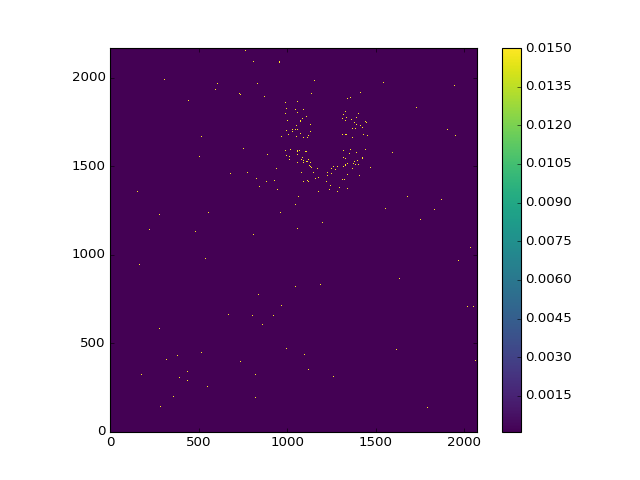

In [27]:
show_img( imgsa[0], vmin=.0001, vmax=.015, ) 

<IPython.core.display.Javascript object>


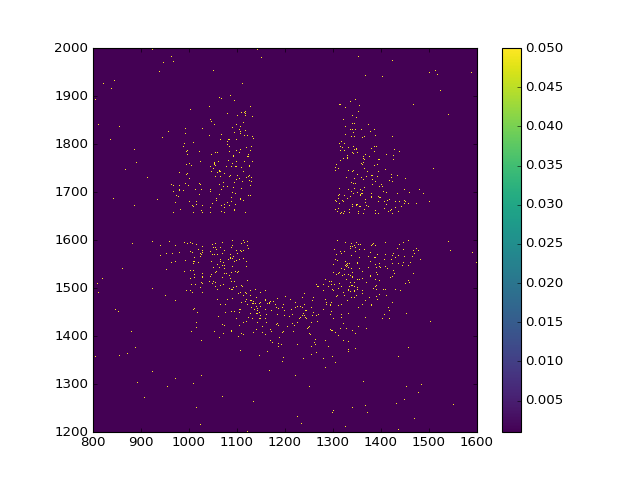

In [31]:
show_img( imgsa[0], vmin=.001, vmax=.05,  xlim= [ 800, 1600], ylim = [1200, 2000],
         save = T,  image_name=uid, path=path) 

<IPython.core.display.Javascript object>


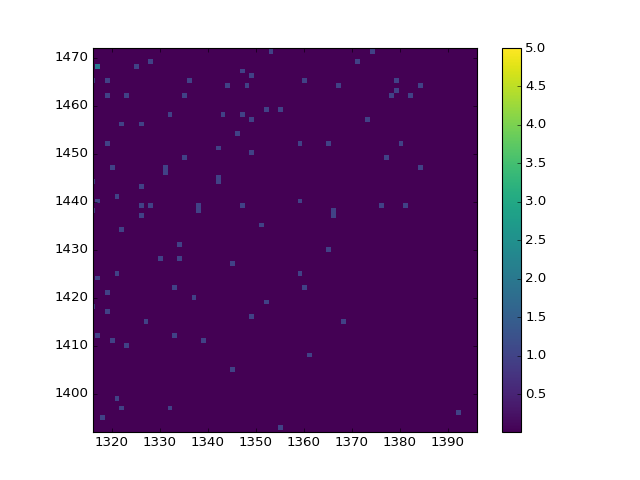

In [32]:
show_img( imgsa[0], vmin=.01, vmax=5,  ylim= [ 1432-40, 1432+40], xlim = [1356-40, 1356+40],
         save = F,  image_name=uid, path=path) 

In [29]:
#%run '/home/yuzhang/Analysis/2016_1/make_movie_B1.py'

In [30]:
#show_img( imgsa[0],  norm= LogNorm(vmin=.1, vmax=5)) 

## Check shutter open frame and get good time series

In [33]:
good_start = check_shutter_open( imgsa,  min_inten=5, time_edge = [0,1], plot_ = False )

The first frame with open shutter is : 0


In [34]:
good_series = apply_mask( imgs[good_start:], mask )
Nimg = len(good_series)

## Find bad frames by checking total scattering intensity 

<IPython.core.display.Javascript object>


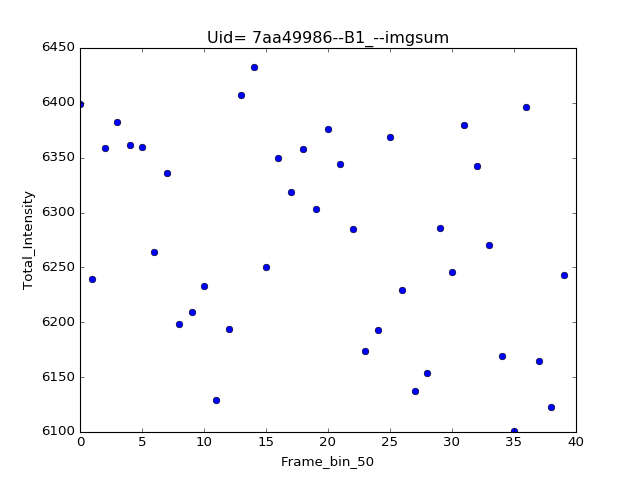

No bad frames are involved.


In [35]:
imgsum, bad_frame_list = get_each_frame_intensity(good_series ,sampling = sampling, 
                                bad_pixel_threshold=1e10,  plot_ = True, uid=uid)

## Get intensity average image

<IPython.core.display.Javascript object>


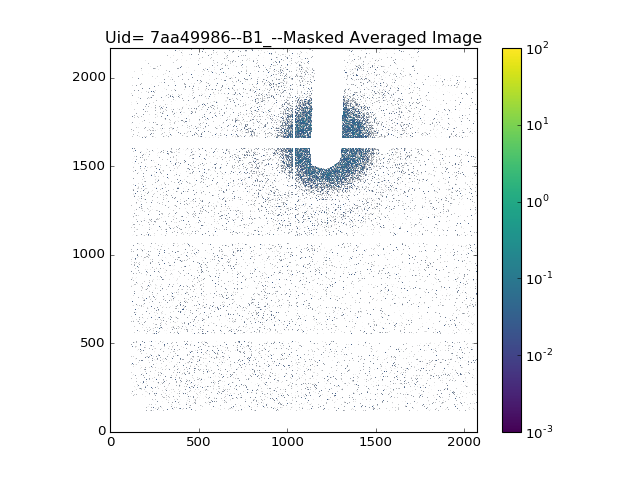

In [36]:
avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)

#avg_img =  get_avg_img( good_series, sampling = 50, plot_ = True, uid =uid)

<IPython.core.display.Javascript object>


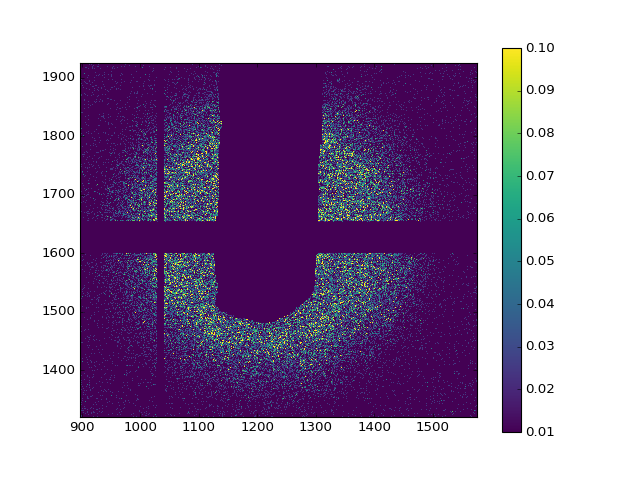

In [40]:
show_img( avg_img, vmin=.01, vmax=.1,    save =F,  image_name=uid, path=path)

<IPython.core.display.Javascript object>


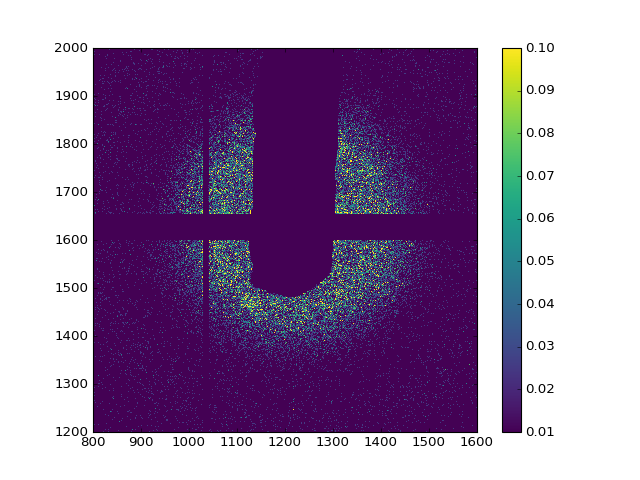

In [37]:
#show_img( avg_img, norm= LogNorm(vmin=.01, vmax=1 ) )
show_img( avg_img, vmin=.01, vmax=.1,  xlim= [ 800, 1600], ylim = [1200, 2000],
         save =T,  image_name=uid, path=path) 

## Get circular average 

In [41]:
hmask = create_hot_pixel_mask( avg_img, 5000)

<IPython.core.display.Javascript object>


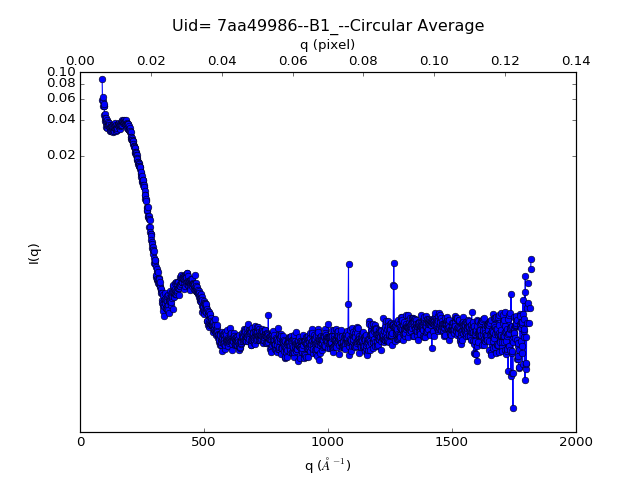

In [42]:
qp, iq, q = get_circular_average( avg_img, mask*hmask, pargs=setup_pargs,
                                plot_ = True, plot_qinpixel=False, save=True )

In [664]:
#214/161

## Create ring mask defined by  inner_radius, outer_radius, width, num_rings

In [47]:
ring_mask, q_ring_center, q_ring_val = get_ring_mask(  mask, inner_radius=130, outer_radius = 520,
                                         width = 2, num_rings = 12, pargs=setup_pargs   )

<IPython.core.display.Javascript object>


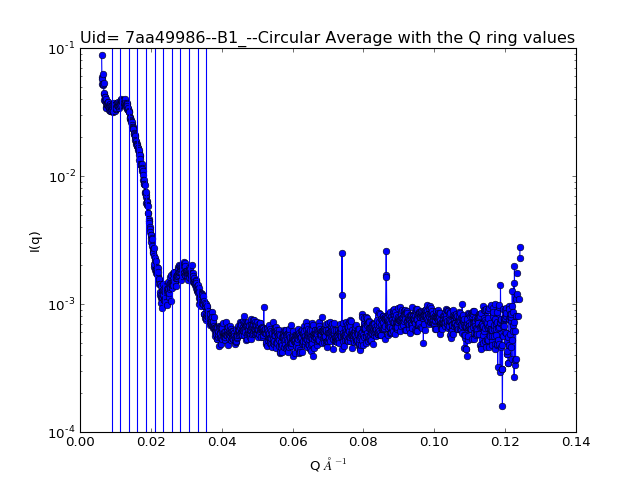

In [48]:
plot_qIq_with_ROI( q, iq, q_ring_center, logs=True, uid=uid)

In [748]:
#q_ring_center

## Check one ring intensity 

<IPython.core.display.Javascript object>


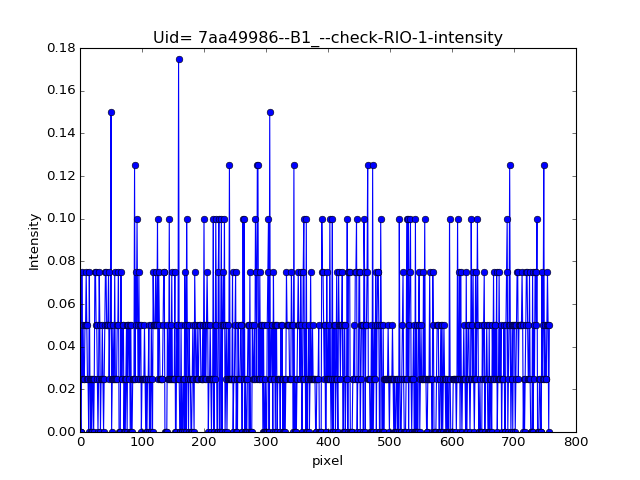

In [49]:
roi_inten = check_ROI_intensity( avg_img, ring_mask, ring_number= 1, uid =uid )

## Check beam damage
* check time~I(q)
* check mean intensity of each ring as a function of time

In [50]:
time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=5, edges = None )

<IPython.core.display.Javascript object>


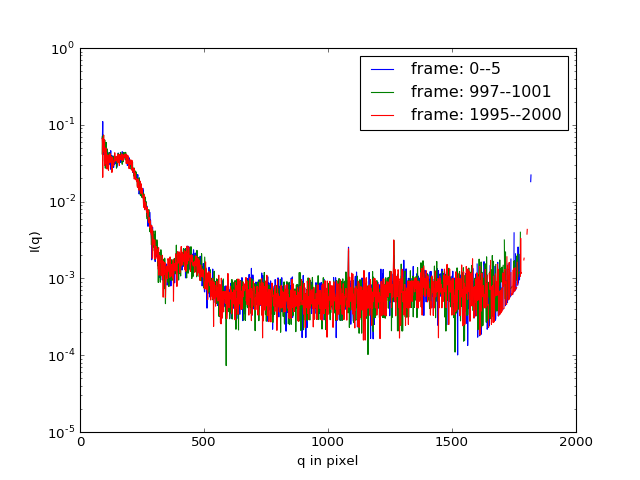

In [51]:
qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True,     )

## Redifine a good_series if there is a beam damage 

In [671]:
#good_series = apply_mask( imgs[good_start:200], mask )
#Nimg = len(good_series)
#time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=5, edges = None )
#qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
#                      nx=1500,  plot_ = True, save=True,     )

#calc_q( Ldet, get_distance( center, [1432, 1356]  )* dpix,  lambda_, )

#avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)


<IPython.core.display.Javascript object>


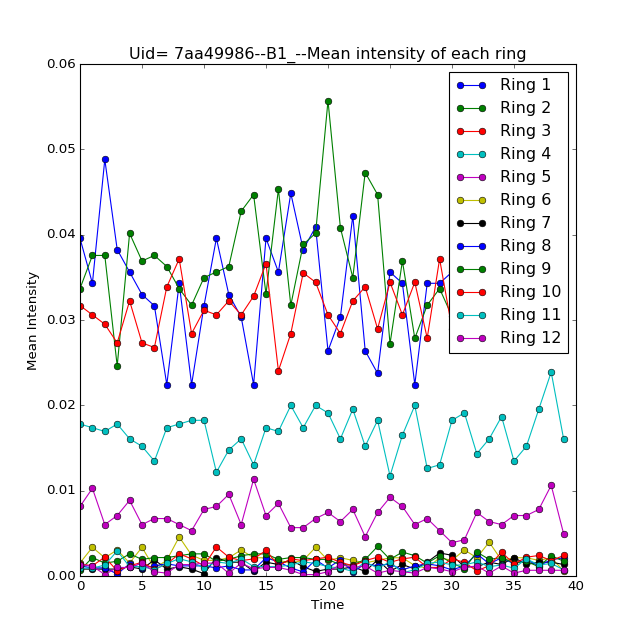

In [54]:
mean_int_sets = get_each_ring_mean_intensity(good_series, ring_mask, sampling = sampling,
               timeperframe = md['frame_time'], plot_ = True , save=True, uid =uid, path = path, )

# Get waterfall

<IPython.core.display.Javascript object>


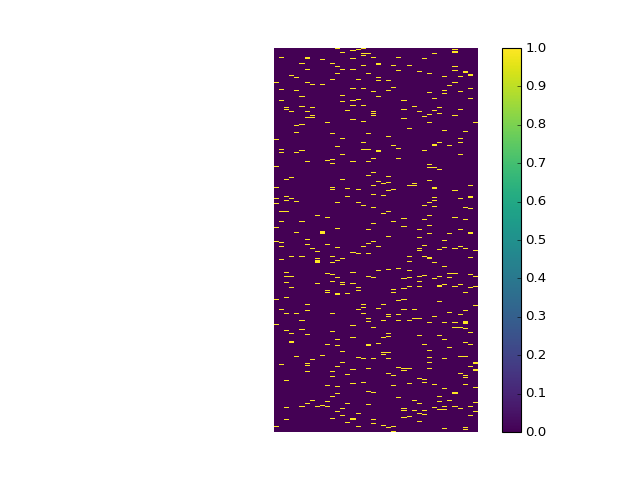

In [57]:
max_inten_ring = np.argmax(  np.average( mean_int_sets[1], axis = 0 )  )
kymo = roi.kymograph(good_series[:: sampling], ring_mask, num = max_inten_ring)
show_img( kymo.T, vmax=1.0, aspect = .1 )

## One time Correlation

In [58]:
bad_image_process = False
if  len(bad_frame_list):
    bad_image_process = True
bad_image_process 

False

In [59]:
t0 = time.time()
g2, lag_steps  =cal_g2( good_series, ring_mask, bad_image_process,
                       bad_frame_list,good_start, num_buf = 8 )
run_time(t0)

In this g2 calculation, the buf and lev number are: 8--10--
2000 frames will be processed...
G2 calculation DONE!
Total time: 1.98 min


In [60]:
taus = lag_steps * timeperframe
res_pargs = dict(taus=taus, q_ring_center=q_ring_center, path=path, uid=uid        )

<IPython.core.display.Javascript object>


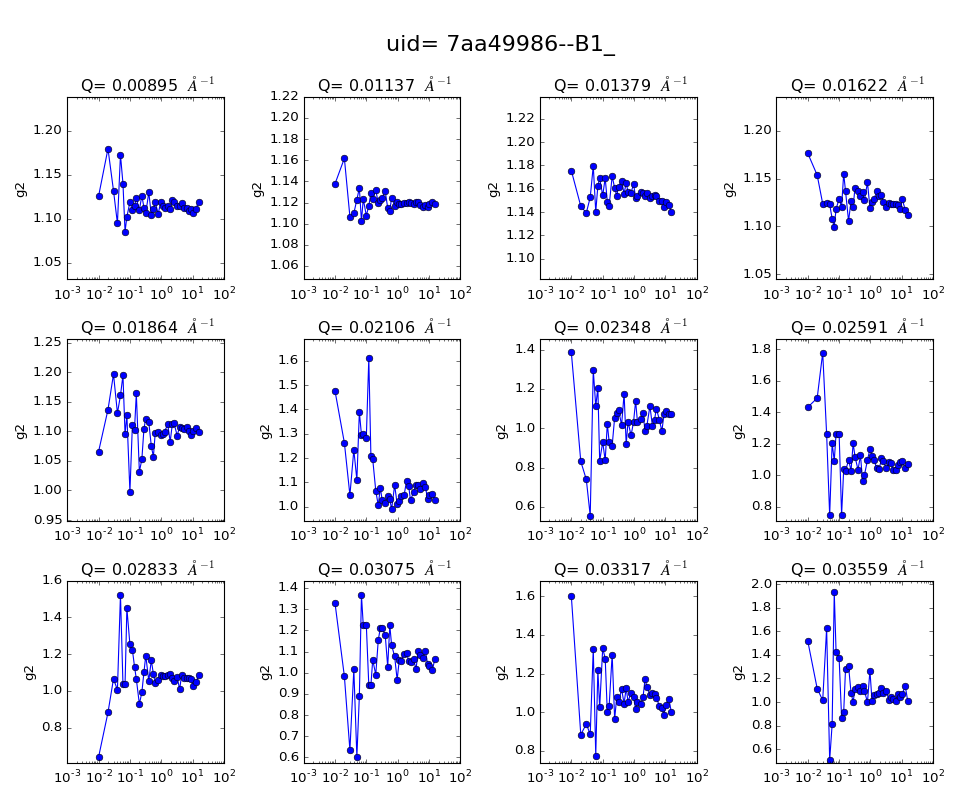

here


In [71]:
plot_saxs_g2( g2, taus, vlim=[0.95, 1.05], res_pargs=res_pargs) 

In [ ]:
#save_saxs_g2(  g2, res_pargs )

<IPython.core.display.Javascript object>


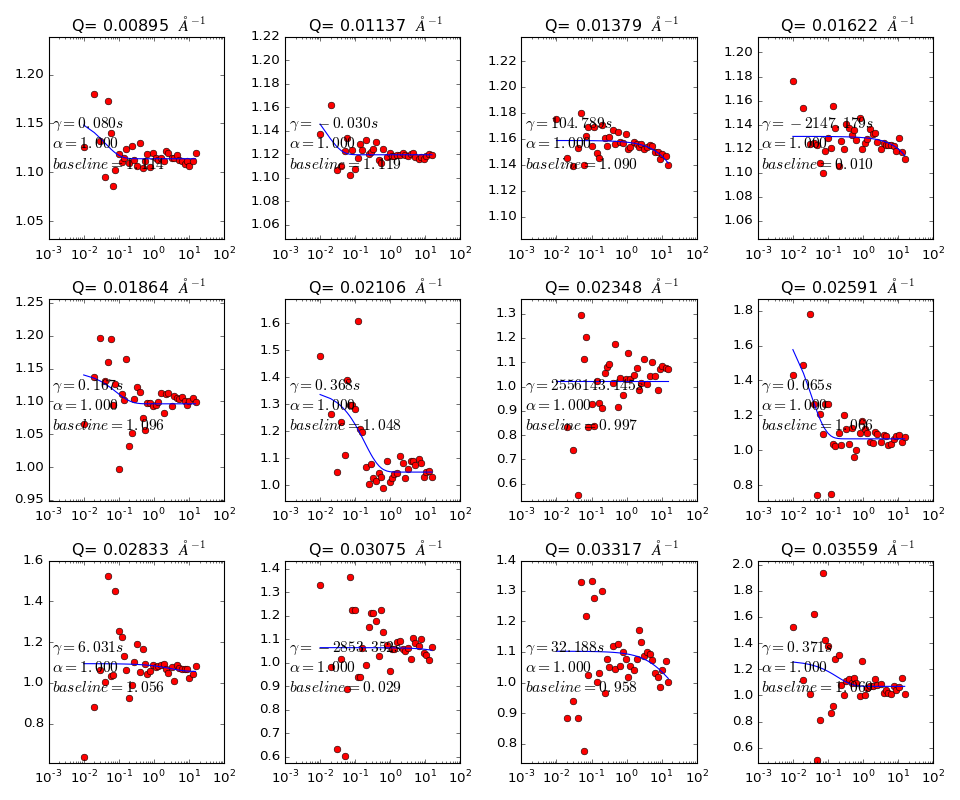

In [73]:
result = fit_saxs_g2( g2, res_pargs, function = 'simple')

## Two time correlation

In [74]:
#kymo = roi.kymograph(good_series[:: 1], qreg_mask, num = 1)
qind, pixelist = roi.extract_label_indices(  ring_mask )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 1.86 min


In [75]:
mean_inten = get_mean_intensity( data_pixel, qind)

In [133]:
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)

[ 0.03474736  0.03738051  0.03149016  0.01690378  0.00691088  0.00222801
  0.00120877  0.0014397   0.00188521  0.0017785   0.00128995  0.00090915]
3.0


In [134]:
 max_inten_ring = np.argmax( K_mean)

In [135]:
pixelist_qi =  np.where( qind == max_inten_ring)[0]         
kymo = data_pixel[:,pixelist_qi] 

<IPython.core.display.Javascript object>


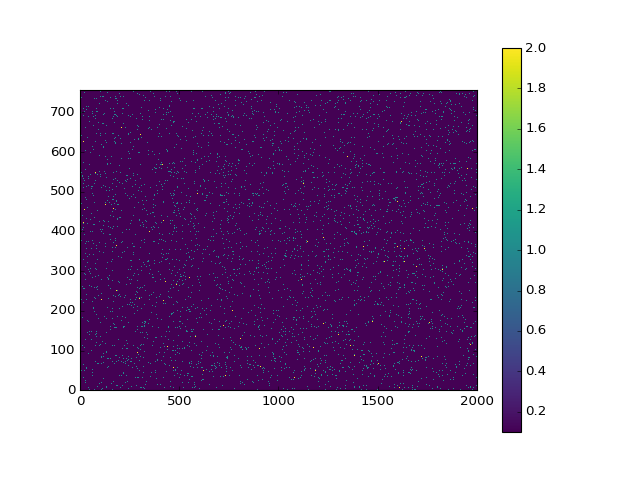

In [142]:
show_img( kymo.T, vmin=.1, vmax=2.0, aspect = 2)

In [145]:
#kymo.mean()

<IPython.core.display.Javascript object>


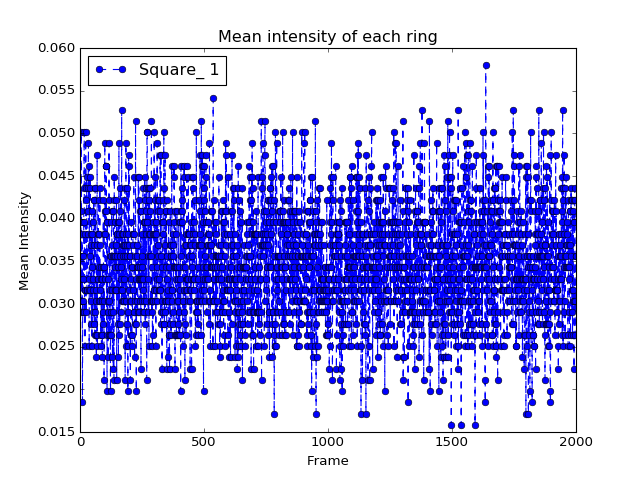

In [76]:

times = np.arange(  mean_inten[1].shape[0]   )  #*timeperframe  # get the time for each frame

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Mean intensity of each ring")
for i in range(1):
    ax.plot(times, mean_inten[i+1], '--o', label="Square_ "+str(i+1))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Intensity")
ax.legend(loc='best') 
plt.show()

### Time correlation analysis

In [ ]:
g12b = auto_two_Array( good_series, ring_mask, data_pixel = data_pixel ) 

<IPython.core.display.Javascript object>


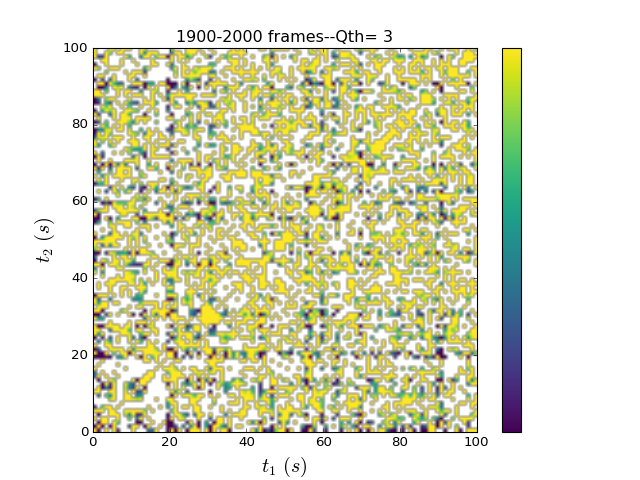

In [131]:

show_C12(g12b, q_ind=3, N1=1900, N2=2000, vmin=1.15, vmax=1.55,  )



In [ ]:
g2b = get_one_time_from_two_time(g12b)

<IPython.core.display.Javascript object>


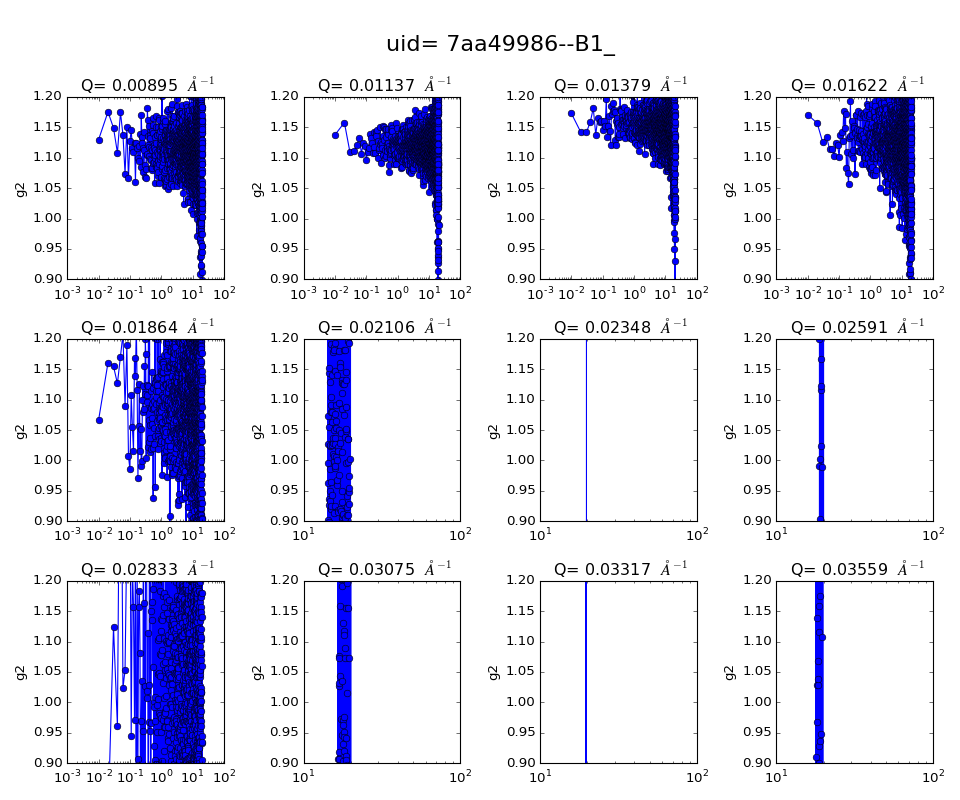

In [89]:
plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 1.2],
             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )

In [ ]:
 
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )

fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

<IPython.core.display.Javascript object>


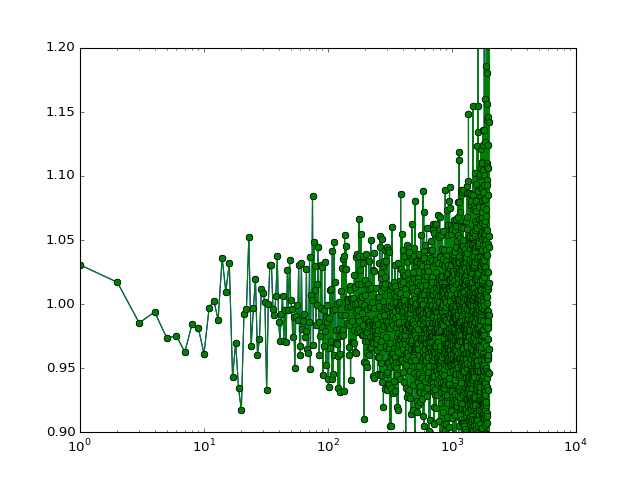

In [98]:
plot1D(g2b[:,3][0:]-.14, logx=True, ylim=[.9,1.2])

### Visibilty Analysis

In [102]:
spe_cts_all, std_dev = xsvs( (good_series,), np.int_(ring_mask), timebin_num=2,
    number_of_img= len(good_series), max_cts=int(max_cts+2), bad_images=None, threshold = 5000 )

##########Total time: 2.23 min


/opt/conda_envs/analysis/lib/python3.4/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(11, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [106]:
num_rings =  (ring_mask).max()
time_steps = utils.geometric_series(2,   len(good_series)   ) [:-3]
num_times = len( time_steps)
print (time_steps)
bin_edges, bin_centers, Knorm_bin_edges, Knorm_bin_centers = get_bin_edges(
      len(time_steps), num_rings, K_mean, int(max_cts+2)  )


[1, 2, 4, 8, 16, 32, 64, 128]


In [427]:
#plot_sxvs( Knorm_bin_edges, spe_cts_all, uid,q_ring_center,xlim=[0,5.5] )

<IPython.core.display.Javascript object>


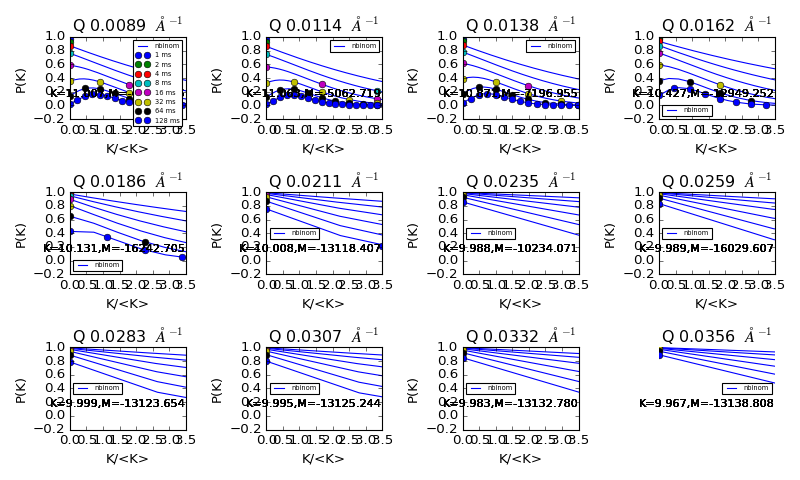

In [107]:
M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'bn',
             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)

In [118]:
#M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'gm',
#             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)
#M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'ps',
#             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)



In [110]:
print ([K_val[i][0] for i in range(num_rings)])
print (K_mean)


[11.006605350171837, 11.062593185259267, 10.871019938355879, 10.426926796855463, 10.130514325545571, 10.008213676224868, 9.9876957256562608, 9.988737948540809, 9.9989941911275846, 9.9953968276382383, 9.9828107644339781, 9.9669672276913257]
[ 0.03474736  0.03738051  0.03149016  0.01690378  0.00691088  0.00222801
  0.00120877  0.0014397   0.00188521  0.0017785   0.00128995  0.00090915]


In [114]:
#%run speckle.py

<IPython.core.display.Javascript object>


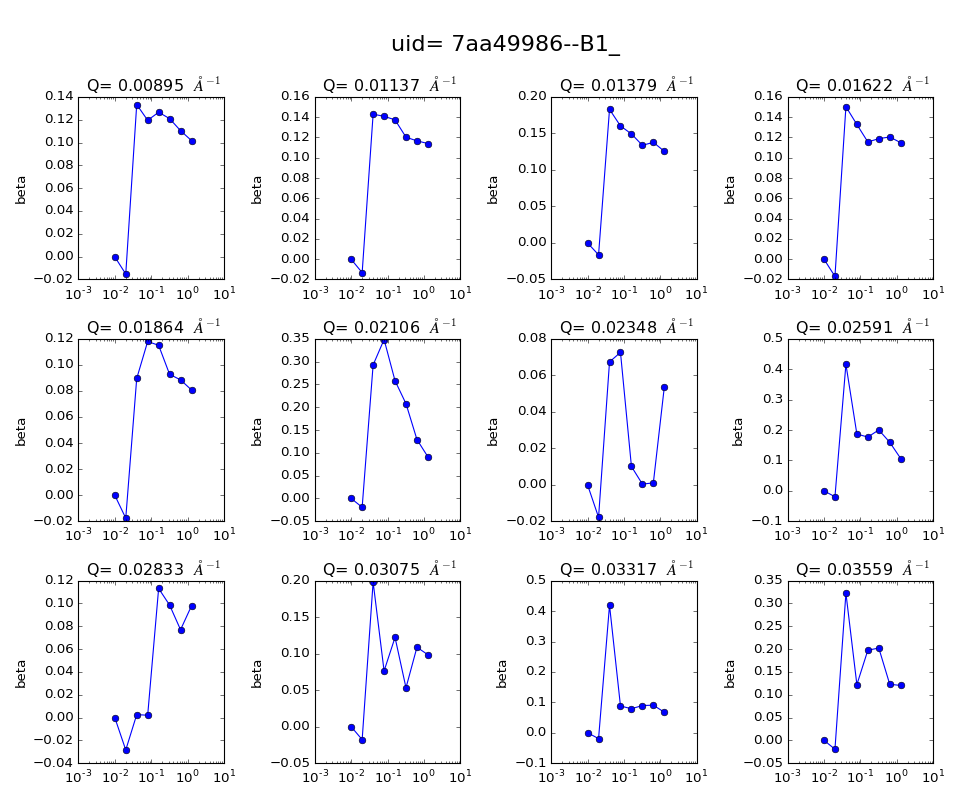

In [115]:
contrast_factor = np.zeros(( num_times,num_rings))

for i in range(num_times):
    for j in range(num_rings):
        contrast_factor[i, j] =  1/M_val[j][i]

plot_xsvs_g2( g2= contrast_factor, taus=np.array( time_steps ) * timeperframe, 
             uid=uid, q_ring_center = q_ring_center, path=path)        

In [234]:
#contrast_factor

<IPython.core.display.Javascript object>


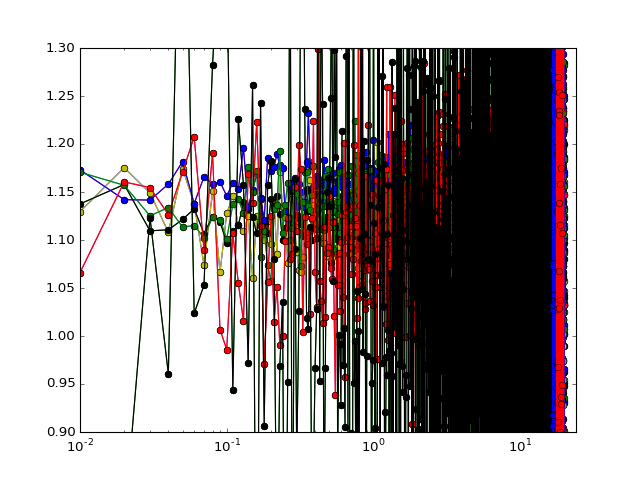

In [117]:
fig, ax = plt.subplots()
plot1D( x= np.arange( len(g2b) )*timeperframe, y= g2b,
           ax=ax, logx=True, ylim=[.9,1.3], xlim = [0,24] )
plot1D( x= np.array( time_steps ) * timeperframe, y=contrast_factor,
           ax=ax, logx=True, ylim=[.9,1.3], xlim = [0,24] ) 

In [468]:
M_val

{0: [-10155.273070173809,
  -53.978809555396708,
  1.8032303367727083,
  2.130060999472549,
  10.342760653862646]}

# The End!